In [1]:
import pandas as pd
import numpy as np
import timeit

def test_solutions(*solutions, df, number):
    for idx, solution in enumerate(solutions):
        def timed_solution():
            solution(df.copy())
            
        time = timeit.timeit(timed_solution, number=number)
        print(f"Solution {idx + 1} Time: {time:.6f} seconds")

In [30]:
df = pd.read_csv('data/ufo.csv')
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,3/3/2005 21:30,holland,mi,us,sphere,60.0,1 minute,Planet-like spherical light in area where no p...,4/16/2005,42.787500,-86.108889
1,8/22/2006 22:30,elgin,il,us,light,1800.0,30 minutes,White lights with blue and red flashing lights...,10/30/2006,42.037222,-88.281111
2,10/12/1999 22:00,phoenix,az,us,fireball,600.0,10 minutes?,Phoenix police dept. helicopters (2) and crew ...,2/23/2000,33.448333,-112.073333
3,8/21/2002 22:30,isle of palms,sc,us,light,30.0,20 to 30 seconds,Strange red lights over the ocean - Isle of Pa...,8/28/2002,32.786667,-79.795000
4,10/3/2007 14:30,plattsmouth,ne,us,fireball,3.0,3 seconds,While I was driving north towards Plattsmouth&...,10/8/2007,41.011389,-95.881944


##### 1. Write a Pandas program to create the todays date.

In [21]:
now = pd.to_datetime('today').normalize()
print(now)

2024-09-07 00:00:00


##### 2. Write a Pandas program to calculate all the sighting days of the unidentified flying object (ufo) from current date.

In [54]:
df = pd.read_csv('data/ufo.csv')
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['sighting_days_from_current_date'] = (pd.to_datetime('today') - df['Date_time']).dt.days
display(df.head())

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,sighting_days_from_current_date
0,2005-03-03 21:30:00,holland,mi,us,sphere,60.0,1 minute,Planet-like spherical light in area where no p...,4/16/2005,42.787500,-86.108889,7127
1,2006-08-22 22:30:00,elgin,il,us,light,1800.0,30 minutes,White lights with blue and red flashing lights...,10/30/2006,42.037222,-88.281111,6590
2,1999-10-12 22:00:00,phoenix,az,us,fireball,600.0,10 minutes?,Phoenix police dept. helicopters (2) and crew ...,2/23/2000,33.448333,-112.073333,9096
3,2002-08-21 22:30:00,isle of palms,sc,us,light,30.0,20 to 30 seconds,Strange red lights over the ocean - Isle of Pa...,8/28/2002,32.786667,-79.795000,8052
4,2007-10-03 14:30:00,plattsmouth,ne,us,fireball,3.0,3 seconds,While I was driving north towards Plattsmouth&...,10/8/2007,41.011389,-95.881944,6184


##### 3. Write a Pandas program to get the current date, oldest date and number of days between Current date and oldest date of Ufo dataset.

In [57]:
df = pd.read_csv('data/ufo.csv')
df['Date_time'] = pd.to_datetime(df['Date_time'])
oldest = df['Date_time'].min()
today = pd.to_datetime('today')
print(f'Number of days between Current date and oldest date: {(today - oldest).days}')

Number of days between Current date and oldest date: 27113


##### 4. Write a Pandas program to get all the sighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*20 days).

In [66]:
df = pd.read_csv('data/ufo.csv')
df['Date_time'] = pd.to_datetime(df['Date_time'])

df['sighting_days_from_current_date'] = (pd.to_datetime('today') - df['Date_time']).dt.days

display(df[df['sighting_days_from_current_date'] <= 365*20])

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,sighting_days_from_current_date
0,2005-03-03 21:30:00,holland,mi,us,sphere,60.0,1 minute,Planet-like spherical light in area where no p...,4/16/2005,42.787500,-86.108889,7127
1,2006-08-22 22:30:00,elgin,il,us,light,1800.0,30 minutes,White lights with blue and red flashing lights...,10/30/2006,42.037222,-88.281111,6590
4,2007-10-03 14:30:00,plattsmouth,ne,us,fireball,3.0,3 seconds,While I was driving north towards Plattsmouth&...,10/8/2007,41.011389,-95.881944,6184
8,2007-10-05 21:15:00,chandler,az,us,sphere,10800.0,3+ hours,Colorful&#44 flashing spheres in the Chandler&...,10/8/2007,33.306111,-111.840556,6181
9,2006-11-08 20:00:00,new braunfels,tx,us,fireball,10.0,10 seconds,2 green fireballs following one another travel...,6/12/2008,29.702778,-98.124167,6513
...,...,...,...,...,...,...,...,...,...,...,...,...
339,2005-06-15 18:30:00,randleman,nc,us,other,60.0,1 minute,It was about 6:30 pm&#44 my husband and his co...,3/31/2008,35.817778,-79.803333,7024
342,2006-04-15 17:15:00,wilmington (suburbs),de,us,sphere,60.0,1 minute,Brilliant sphere floats above the Wilmington S...,7/16/2006,39.745833,-75.546944,6720
343,2006-12-20 07:15:00,cambridge (canada),on,ca,light,10.0,10sec,Bright white light appeared then disappeared l...,2/1/2007,43.383333,-80.316667,6471
345,2009-10-10 20:45:00,wilmington,nc,us,light,600.0,10minutes,Two lights seen with a lighting of something s...,12/12/2009,34.225556,-77.945000,5446


##### 5. Write a Pandas program to get all the sighting days of the unidentified flying object (ufo) between 1950-10-10 and 1960-10-10.

In [84]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])

result = df[df['Date_time'].between('1950-10-10', '1960-10-10')]
display(result.head())

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
480,1952-10-01 03:30:00,fukuoka (japan),NaN,NaN,disk,1200,about 20 mins,UFO seen by multiple U. S. military personnel;...,12/7/2006,33.590355,130.401716
481,1952-10-01 12:00:00,kansas city,mo,us,disk,90,90 sec.,1952 daylight sighting of multiple discs in fo...,10/31/2008,39.0997222,-94.578333
482,1954-10-01 19:00:00,flatwoods,wv,us,circle,60,1 minute,I saw the craft go across the horizon. It app...,4/12/2013,38.7230556,-80.650000


##### 6. Write a Pandas program to get all the sighting years of the unidentified flying object (ufo) and create the year as column.

In [89]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df.insert(loc=0, value=df['Date_time'].dt.year, column='Year')
display(df.head())

,Year,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,1949,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


##### 7. Write a Pandas program to create a plot to present the number of unidentified flying object (UFO) reports per year.

<Axes: xlabel='Year'>

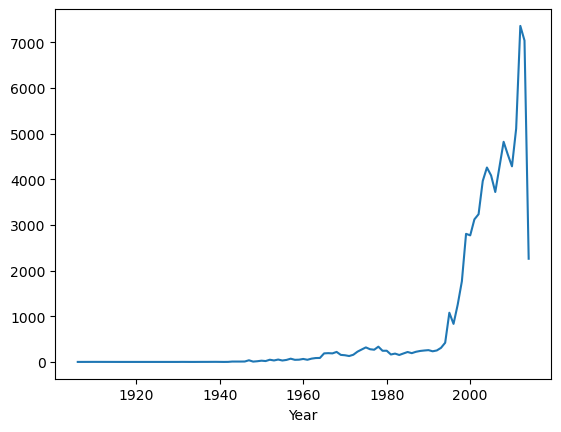

In [109]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])

df.insert(loc=0, value=df['Date_time'].dt.year, column='Year')

df.groupby('Year')['Year'].count().plot()

<Axes: xlabel='Year'>

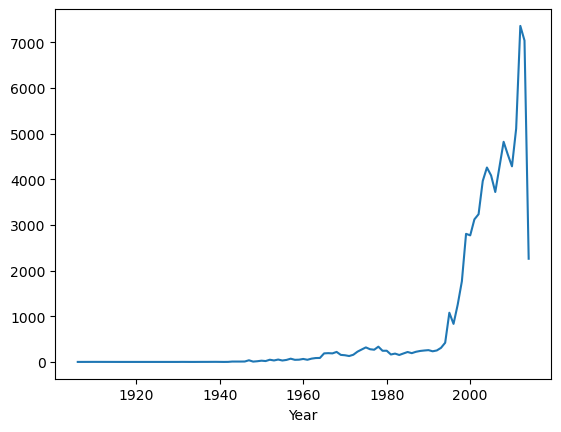

In [108]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])

df.insert(loc=0, value=df['Date_time'].dt.year, column='Year')

df['Year'].value_counts().sort_index().plot()

##### 8. Write a Pandas program to extract year, month, day, hour, minute, second and weekday from unidentified flying object (UFO) reporting date.

In [136]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])

date = df['Date_time'].dt
df['Year'] = date.year
df['Month'] = date.month
df['Day'] = date.day
df['Hour'] = date.hour
df['Minute'] = date.minute
df['Second'] = date.second
df['Weekday'] = date.day_name()
display(df[['Date_time', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Weekday']])

,Date_time,Year,Month,Day,Hour,Minute,Second,Weekday
0,1949-10-10 20:30:00,1949,10,10,20,30,0,Monday
1,1949-10-10 21:00:00,1949,10,10,21,0,0,Monday
2,1955-10-10 17:00:00,1955,10,10,17,0,0,Monday
3,1956-10-10 21:00:00,1956,10,10,21,0,0,Wednesday
4,1960-10-10 20:00:00,1960,10,10,20,0,0,Monday
...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,2013,9,9,21,15,0,Monday
80328,2013-09-09 22:00:00,2013,9,9,22,0,0,Monday
80329,2013-09-09 22:00:00,2013,9,9,22,0,0,Monday
80330,2013-09-09 22:20:00,2013,9,9,22,20,0,Monday


##### 9. Write a Pandas program to convert given datetime to timestamp.

In [139]:
import datetime
now = datetime.datetime.now()
print(now)
print(type(now))
now_timestamp = pd.Timestamp(now)
print(now_timestamp)
print(type(now_timestamp))

2024-09-07 21:33:01.229973
<class 'datetime.datetime'>
2024-09-07 21:33:01.229973
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [142]:
import datetime as dt

df = pd.DataFrame(
    index=pd.date_range(
        start=dt.datetime(2019,1,1,0,0,1),
        end=dt.datetime(2019,1,1,10,0,1), 
        freq='h'
    )
).reset_index().rename(columns={'index':'datetime'})

print("Sample datetime data:")
print(df.head(10))

df['ts'] = df.datetime.values.astype(np.int64)

print("\nConvert datetime to timestamp:")
print (df)

Sample datetime data:
             datetime
0 2019-01-01 00:00:01
1 2019-01-01 01:00:01
2 2019-01-01 02:00:01
3 2019-01-01 03:00:01
4 2019-01-01 04:00:01
5 2019-01-01 05:00:01
6 2019-01-01 06:00:01
7 2019-01-01 07:00:01
8 2019-01-01 08:00:01
9 2019-01-01 09:00:01

Convert datetime to timestamp:
              datetime          ts
0  2019-01-01 00:00:01  1546300801
1  2019-01-01 01:00:01  1546304401
2  2019-01-01 02:00:01  1546308001
3  2019-01-01 03:00:01  1546311601
4  2019-01-01 04:00:01  1546315201
5  2019-01-01 05:00:01  1546318801
6  2019-01-01 06:00:01  1546322401
7  2019-01-01 07:00:01  1546326001
8  2019-01-01 08:00:01  1546329601
9  2019-01-01 09:00:01  1546333201
10 2019-01-01 10:00:01  1546336801


##### 10. Write a Pandas program to count year-country wise frequency of reporting dates of unidentified flying object(UFO).

In [4]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Year'] = df['Date_time'].dt.year
df.groupby(['Year', 'country']).size()

Year  country
1910  us            2
1920  us            1
1925  us            1
1929  us            1
1931  us            2
                 ... 
2014  au           14
      ca           45
      de            3
      gb           21
      us         1964
Length: 282, dtype: int64

##### 11. Write a Pandas program to extract unique reporting dates of unidentified flying object (UFO).

In [6]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Date_time'].unique()

<DatetimeArray>
['1949-10-10 20:30:00', '1949-10-10 21:00:00', '1955-10-10 17:00:00',
 '1956-10-10 21:00:00', '1960-10-10 20:00:00', '1961-10-10 19:00:00',
 '1965-10-10 21:00:00', '1965-10-10 23:45:00', '1966-10-10 20:00:00',
 '1966-10-10 21:00:00',
 ...
 '2013-09-09 12:34:00', '2013-09-09 13:10:00', '2013-09-09 20:15:00',
 '2013-09-09 20:20:00', '2013-09-09 20:21:00', '2013-09-09 21:00:00',
 '2013-09-09 21:15:00', '2013-09-09 22:00:00', '2013-09-09 22:20:00',
 '2013-09-09 23:00:00']
Length: 69434, dtype: datetime64[ns]

##### 12. Write a Pandas program to get the difference (in days) between documented date and reporting date of unidentified flying object (UFO).

In [14]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['date_documented'] = pd.to_datetime(df['date_documented'])
df['difference'] = (df['date_documented'] - df['Date_time']).dt.days
display(df.head())

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,difference
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,19922
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,20520
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,19095
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,17264
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,15808


##### 13. Write a Pandas program to add 100 days with reporting date of unidentified flying object (UFO).

In [22]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])

days100 = pd.Timedelta(value=100, unit='d')

df.insert(
    loc=1, 
    value=df['Date_time']+days100, 
    column='Date_time_100'
)

display(df)

,Date_time,Date_time_100,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,1949-10-10 20:30:00,1950-01-18 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,1950-01-18 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,1956-01-18 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,1957-01-18 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,1961-01-18 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,2013-12-18 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,2013-09-09 22:00:00,2013-12-18 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,2013-09-09 22:00:00,2013-12-18 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,2013-09-09 22:20:00,2013-12-18 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


##### 14. Write a Pandas program to generate sequences of fixed-frequency dates and time spans.

In [26]:
display(pd.period_range(start='2024-01-01', end='2024-01-31', freq='5h'))

PeriodIndex(['2024-01-01 00:00', '2024-01-01 05:00', '2024-01-01 10:00',
             '2024-01-01 15:00', '2024-01-01 20:00', '2024-01-02 01:00',
             '2024-01-02 06:00', '2024-01-02 11:00', '2024-01-02 16:00',
             '2024-01-02 21:00',
             ...
             '2024-01-29 03:00', '2024-01-29 08:00', '2024-01-29 13:00',
             '2024-01-29 18:00', '2024-01-29 23:00', '2024-01-30 04:00',
             '2024-01-30 09:00', '2024-01-30 14:00', '2024-01-30 19:00',
             '2024-01-31 00:00'],
            dtype='period[5h]', length=145)

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 05:00:00',
               '2024-01-01 10:00:00', '2024-01-01 15:00:00',
               '2024-01-01 20:00:00', '2024-01-02 01:00:00',
               '2024-01-02 06:00:00', '2024-01-02 11:00:00',
               '2024-01-02 16:00:00', '2024-01-02 21:00:00',
               ...
               '2024-01-29 03:00:00', '2024-01-29 08:00:00',
               '2024-01-29 13:00:00', '2024-01-29 18:00:00',
               '2024-01-29 23:00:00', '2024-01-30 04:00:00',
               '2024-01-30 09:00:00', '2024-01-30 14:00:00',
               '2024-01-30 19:00:00', '2024-01-31 00:00:00'],
              dtype='datetime64[ns]', length=145, freq='5h')

##### 15. Write a Pandas program to create a conversion between strings and datetime.

In [27]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['date_documented'] = pd.to_datetime(df['date_documented'])
df

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556


##### 16. Write a Pandas program to manipulate and convert date times with timezone information.

In [31]:
datetime_utc_now = pd.to_datetime('now', utc=True)
datetime_moscow_now = datetime_utc_now.tz_convert('Europe/Moscow')

print(datetime_utc_now)
print(datetime_moscow_now)

2024-09-09 04:52:58.032421+00:00
2024-09-09 07:52:58.032421+03:00


In [33]:
dtt = pd.date_range('2018-01-01', periods=3, freq='h')
dtt = dtt.tz_localize('UTC')
print(dtt)
print("\nFrom UTC to America/Los_Angeles:")
dtt = dtt.tz_convert('America/Los_Angeles')
print(dtt)

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='h')

From UTC to America/Los_Angeles:
DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, America/Los_Angeles]', freq='h')


##### 17. Write a Pandas program to get the average mean of the UFO (unidentified flying object) sighting was reported.

In [60]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Year'] = df['Date_time'].dt.year

df['length_of_encounter_seconds'] = pd.to_numeric(df['length_of_encounter_seconds'], errors='coerce')
display(df.groupby('country')['length_of_encounter_seconds'].mean())

display(df.pivot_table('length_of_encounter_seconds', 'Year', 'country', margins=True))

country
au     3806.469238
ca    28859.437007
de    24255.980952
gb    66061.321207
us     5800.192049
Name: length_of_encounter_seconds, dtype: float64

country,au,ca,de,gb,us,All
Year,,,,,,
1910,NaN,NaN,NaN,NaN,120.000000,120.000000
1920,NaN,NaN,NaN,NaN,60.000000,60.000000
1925,NaN,NaN,NaN,NaN,60.000000,60.000000
1929,NaN,NaN,NaN,NaN,60.000000,60.000000
1931,NaN,NaN,NaN,NaN,930.000000,930.000000
...,...,...,...,...,...,...
2011,733.153846,928.551181,681.666667,5677.588235,2544.292555,2527.993899
2012,232.473684,1036.347107,337.333333,291.939024,10640.644916,10125.963693
2013,38334.218750,595.994032,136.333333,11753.395833,1266.387888,1503.713235


##### 18. Write a Pandas program to create a graphical analysis of UFO (unidentified flying object) Sightings year.

<Axes: xlabel='Year'>

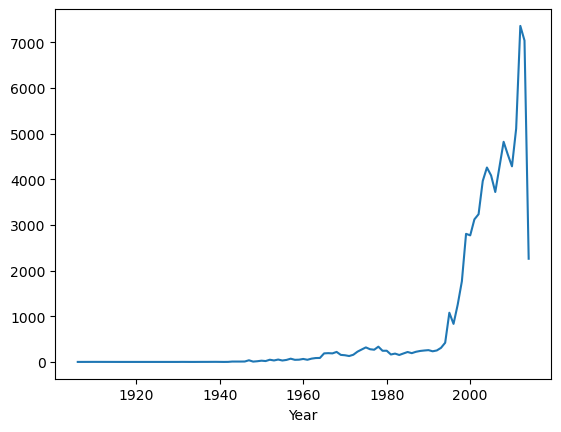

In [64]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Year'] = df['Date_time'].dt.year

df.groupby('Year').size().plot()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_5396\1569724931.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  years_plot = sns.barplot(x=years_index,y=years_values, palette = "Reds")


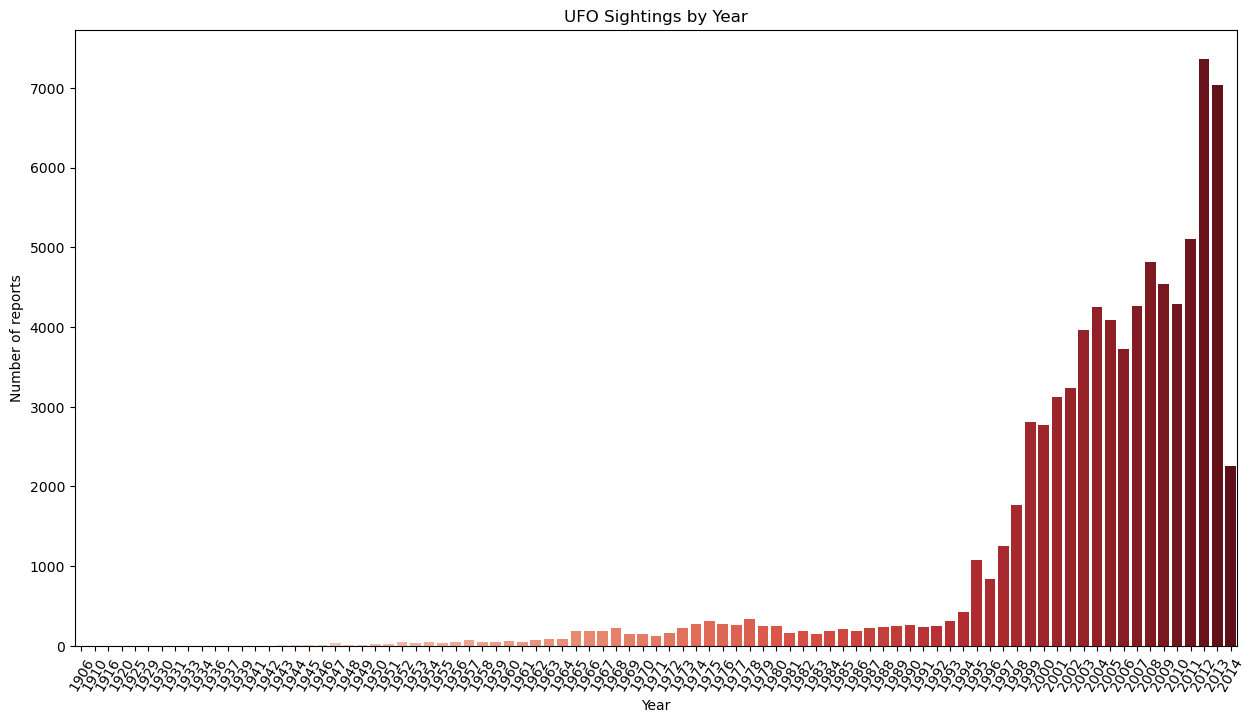

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Year'] = df['Date_time'].dt.year
years_data = df.Year.value_counts()
years_index = years_data.index
years_values = years_data.values
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')
plt.xlabel("Year")
plt.ylabel("Number of reports")
years_plot = sns.barplot(x=years_index,y=years_values, palette = "Reds")

##### 19. Write a Pandas program to check the empty values of UFO (unidentified flying object) Dataframe.

In [74]:
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df.isna().sum()

Date_time                             0
city                                  0
state/province                     5797
country                            9670
UFO_shape                          1932
length_of_encounter_seconds           0
described_duration_of_encounter       0
description                          15
date_documented                       0
latitude                              0
longitude                             0
dtype: int64

##### 20. Write a Pandas program to create a plot of distribution of UFO (unidentified flying object) observation time.

C:\Users\Alexander\AppData\Local\Temp\ipykernel_5396\2252562774.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp)


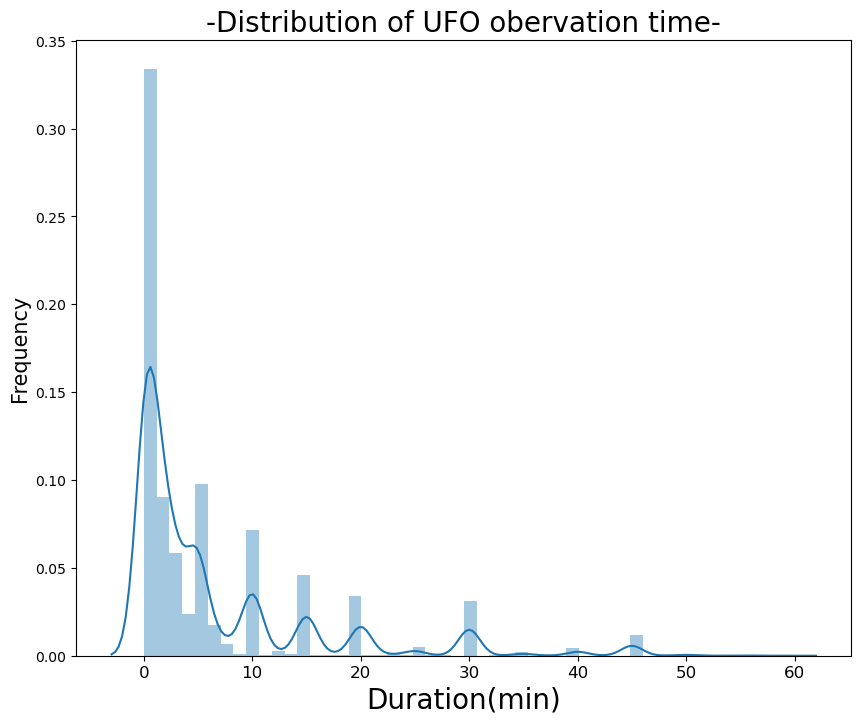

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)

df['duration_sec'] = (pd.to_numeric(df['length_of_encounter_seconds'], errors='coerce'))/60

s = df["duration_sec"].quantile(0.95)

temp = df['duration_sec']
temp = temp.sort_values()
temp = temp[temp < s]

plt.figure(figsize=(10, 8))
sns.distplot(temp)
plt.xlabel('Duration(min)', fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=12)
plt.title("-Distribution of UFO obervation time-", fontsize=20)
plt.show()

##### 21. Write a Pandas program to create a graphical analysis of UFO (unidentified flying object) sighted by month.

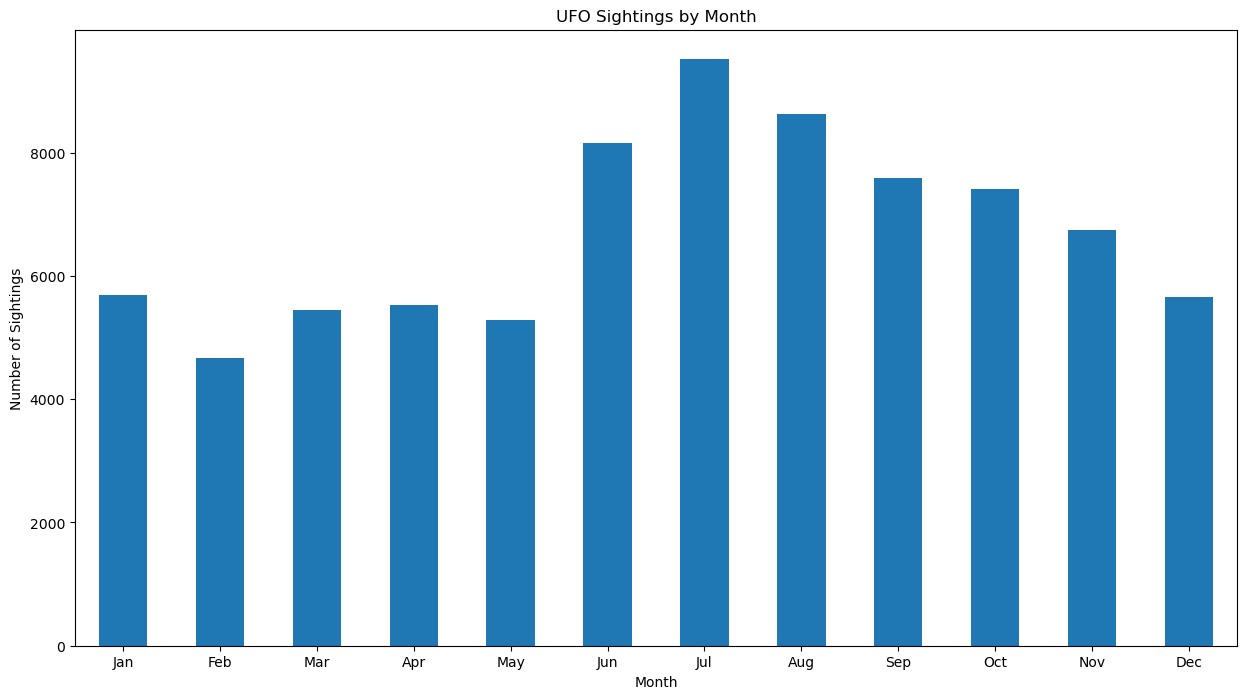

In [113]:
import matplotlib.pyplot as plt

df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df['Month'] = df['Date_time'].dt.month

# Group by month and count the number of sightings in each month
df_month = df.groupby('Month').size().reset_index(name='Number')

# Plot the data as a bar chart with the specified figsize
df_month.plot(kind='bar', x='Month', y='Number', legend=False, figsize=(15, 8))

# Set plot labels and title
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Display the plot
plt.show()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_5396\407732688.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  months_plot = sns.barplot(x=months_index[:60],y=months_values[:60], palette = "Oranges")


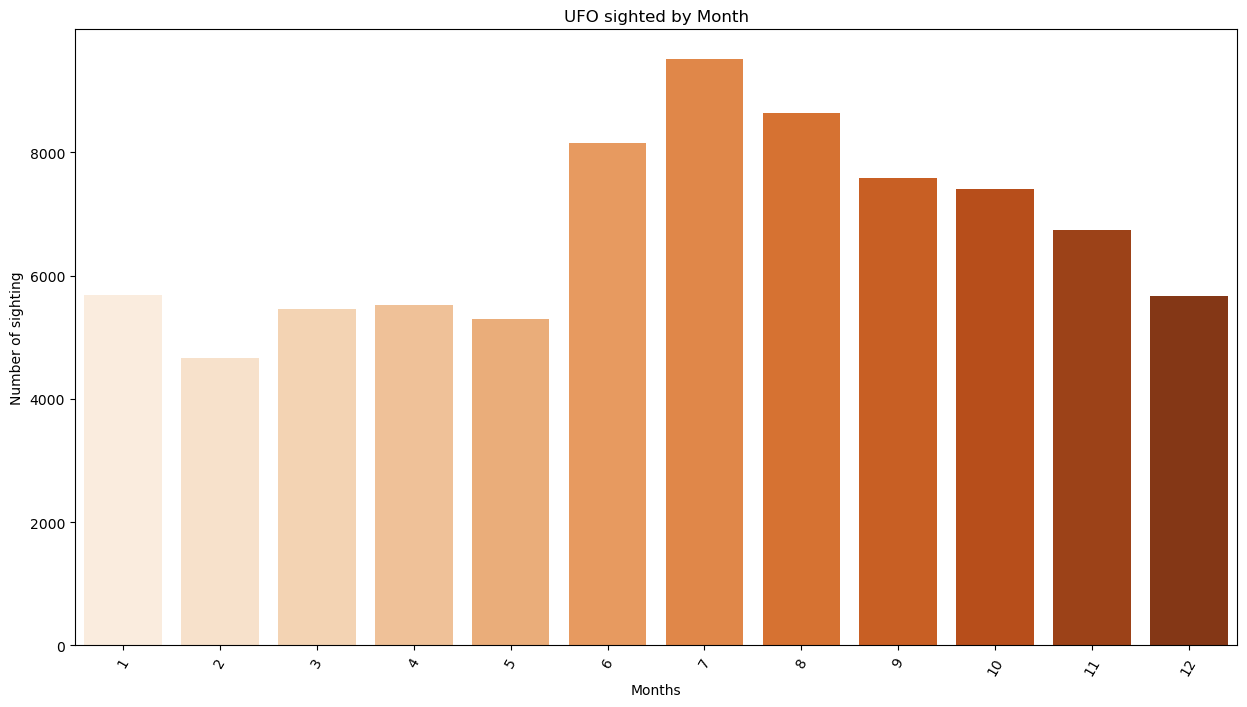

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = df['Date_time'].astype('datetime64[ns]')

df["ufo_yr"] = df.Date_time.dt.month

months_data = df.ufo_yr.value_counts()
months_index = months_data.index  # x ticks
months_values = months_data.values

plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO sighted by Month')
plt.xlabel("Months")
plt.ylabel("Number of sighting")
months_plot = sns.barplot(x=months_index[:60],y=months_values[:60], palette = "Oranges")

##### 22. Write a Pandas program to create a comparison of the top 10 years in which the UFO was sighted vs the hours of the day.

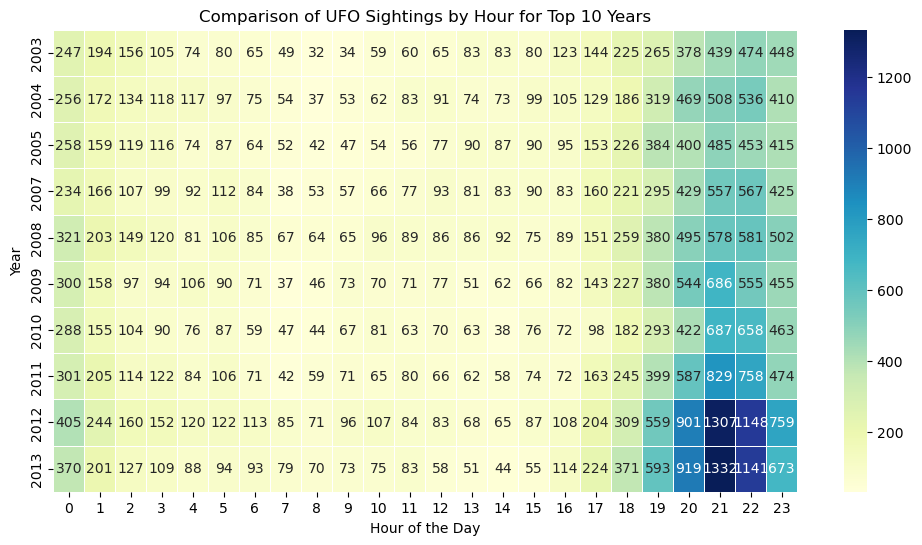

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')

# Extract the year and hour from the 'Date_time' column
df['Year'] = df['Date_time'].dt.year
df['Hour'] = df['Date_time'].dt.hour

# Group by year to get the count of sightings in each year
year_counts = df['Year'].value_counts().nlargest(10)
top_10_years = year_counts.index

# Filter the dataframe to include only sightings from the top 10 years
df_top_10 = df[df['Year'].isin(top_10_years)]

# Create a pivot table to compare the number of sightings in each hour for the top 10 years
pivot_table = df_top_10.pivot_table(index='Year', columns='Hour', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap for better visualization
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Comparison of UFO Sightings by Hour for Top 10 Years')
plt.xlabel('Hour of the Day')
plt.ylabel('Year')
plt.show()

##### 23. Write a Pandas program to create a comparison of the top 10 years in which the UFO was sighted vs each Month.

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df['Year'] = df['Date_time'].dt.year
df['Month'] = df['Date_time'].dt.month

top_10_years = df['Year'].value_counts().nlargest(10).index
top_10_years_df = df[df['Year'].isin(top_10_years)].pivot_table(index='Year', columns='Month', aggfunc='size').sort_index(ascending=False)
top_10_years_df.columns = pd.to_datetime(top_10_years_df.columns, format='%m').month_name()
display(top_10_years_df)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2013,356,264,372,387,487,581,902,842,717,720,719,690
2012,528,357,489,462,472,695,880,827,695,620,719,613
2011,298,255,309,294,283,374,715,599,503,590,403,484
2010,258,171,236,269,306,341,793,480,414,422,316,277
2009,454,367,313,294,339,357,543,464,569,286,293,262
2008,436,345,304,404,313,443,530,468,356,485,419,317
2007,398,243,331,290,278,384,432,430,416,398,341,328
2005,228,255,327,294,271,370,419,321,480,444,420,254
2004,266,265,372,355,353,376,401,498,379,417,294,281


##### 24. Write a Pandas program to create a heatmap (rectangular data as a color-encoded matrix) for comparison of the top 10 years in which the UFO was sighted vs each Month.

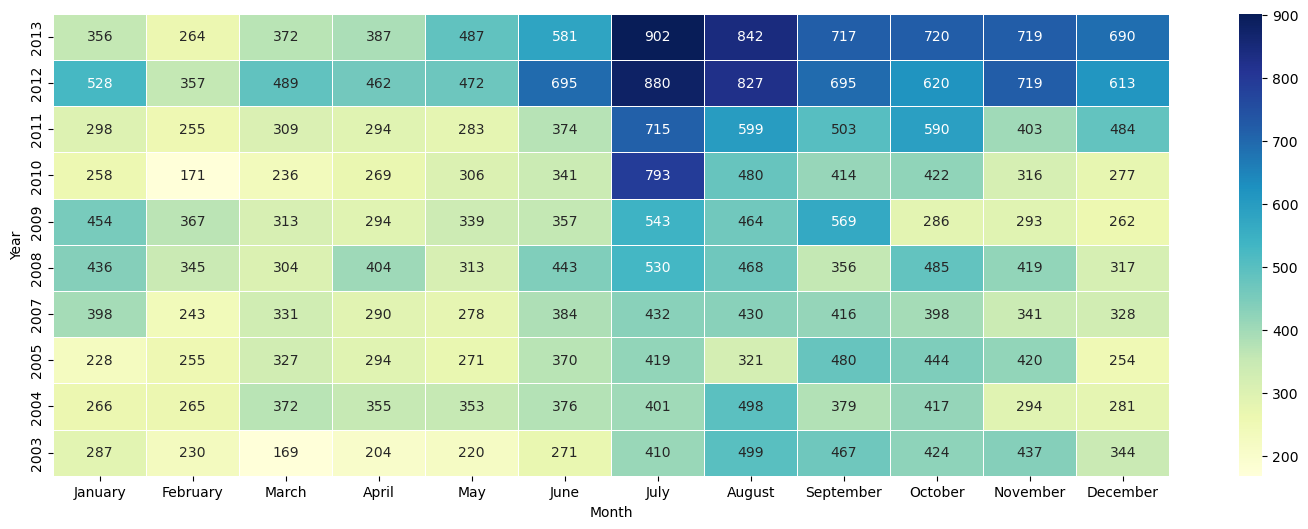

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df['Year'] = df['Date_time'].dt.year
df['Month'] = df['Date_time'].dt.month

top_10_years = df['Year'].value_counts().nlargest(10).index
top_10_years_df = df[df['Year'].isin(top_10_years)].pivot_table(index='Year', columns='Month', aggfunc='size').sort_index(ascending=False)
top_10_years_df.columns = pd.to_datetime(top_10_years_df.columns, format='%m').month_name()

plt.figure(figsize=(18, 6))
# plt.yticks(rotation='horizontal')
# plt.xticks(rotation='horizontal')
sns.heatmap(top_10_years_df, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.show()

##### 25. Write a Pandas program to create a Timewheel of Hour Vs Year comparison of the top 10 years in which the UFO was sighted.

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2013,370,201,127,109,88,94,93,79,70,73,...,44,55,114,224,371,593,919,1332,1141,673
2012,405,244,160,152,120,122,113,85,71,96,...,65,87,108,204,309,559,901,1307,1148,759
2011,301,205,114,122,84,106,71,42,59,71,...,58,74,72,163,245,399,587,829,758,474
2010,288,155,104,90,76,87,59,47,44,67,...,38,76,72,98,182,293,422,687,658,463
2009,300,158,97,94,106,90,71,37,46,73,...,62,66,82,143,227,380,544,686,555,455
2008,321,203,149,120,81,106,85,67,64,65,...,92,75,89,151,259,380,495,578,581,502
2007,234,166,107,99,92,112,84,38,53,57,...,83,90,83,160,221,295,429,557,567,425
2005,258,159,119,116,74,87,64,52,42,47,...,87,90,95,153,226,384,400,485,453,415
2004,256,172,134,118,117,97,75,54,37,53,...,73,99,105,129,186,319,469,508,536,410


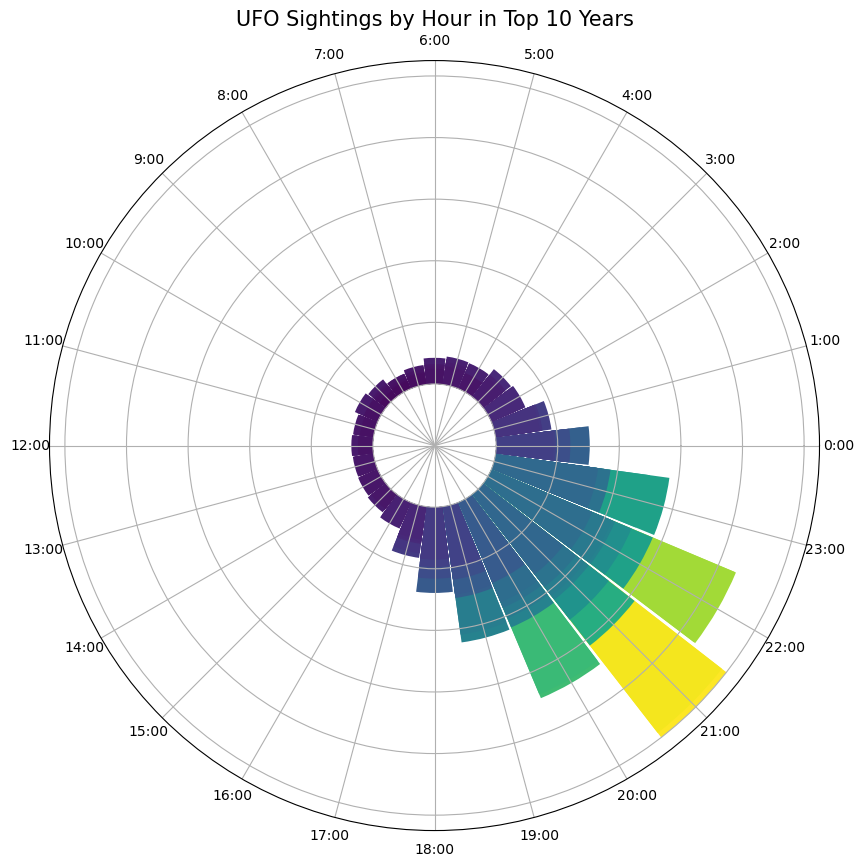

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df['Year'] = df['Date_time'].dt.year
df['Hour'] = df['Date_time'].dt.hour

top_10_years = df['Year'].value_counts().nlargest(10).index
top_10_years_df = df[df['Year'].isin(top_10_years)].pivot_table(index='Year', columns='Hour', aggfunc='size').sort_index(ascending=False)
display(top_10_years_df)

# Flatten the pivot table for plotting
data = top_10_years_df.stack().reset_index(name='Count')

# Convert hours to radians (0-23 hours mapped to 0-2π radians)
data['Hour_rad'] = np.deg2rad(data['Hour'] * (360 / 24))

# Create the figure and polar axis
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Normalize the counts for better visibility
max_count = data['Count'].max()
radii = data['Count'] / max_count * 10  # Scale the data for visibility

# Plotting
bars = ax.bar(data['Hour_rad'], radii, width=0.25, bottom=2, color=plt.cm.viridis(data['Count'] / max_count))

# Set the labels and title
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))  # Set labels at each hour
ax.set_xticklabels([f'{hour}:00' for hour in range(24)])
ax.set_yticklabels([])  # Hide radial ticks

plt.title('UFO Sightings by Hour in Top 10 Years', size=15)
plt.show()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2013,370,201,127,109,88,94,93,79,70,73,...,44,55,114,224,371,593,919,1332,1141,673
2012,405,244,160,152,120,122,113,85,71,96,...,65,87,108,204,309,559,901,1307,1148,759
2011,301,205,114,122,84,106,71,42,59,71,...,58,74,72,163,245,399,587,829,758,474
2010,288,155,104,90,76,87,59,47,44,67,...,38,76,72,98,182,293,422,687,658,463
2009,300,158,97,94,106,90,71,37,46,73,...,62,66,82,143,227,380,544,686,555,455
2008,321,203,149,120,81,106,85,67,64,65,...,92,75,89,151,259,380,495,578,581,502
2007,234,166,107,99,92,112,84,38,53,57,...,83,90,83,160,221,295,429,557,567,425
2005,258,159,119,116,74,87,64,52,42,47,...,87,90,95,153,226,384,400,485,453,415
2004,256,172,134,118,117,97,75,54,37,53,...,73,99,105,129,186,319,469,508,536,410


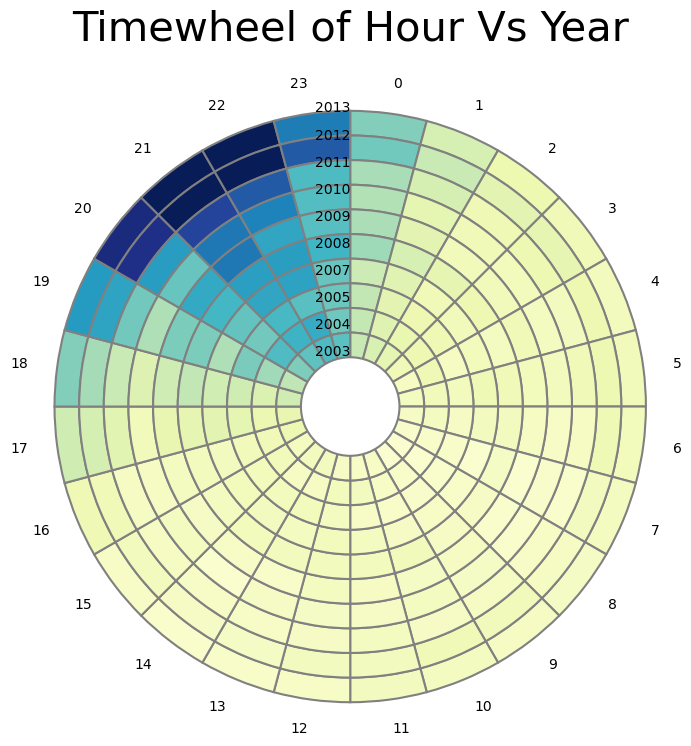

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ufo_sighting_data.csv', low_memory=False)
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df['Year'] = df['Date_time'].dt.year
df['Hour'] = df['Date_time'].dt.hour

top_10_years = df['Year'].value_counts().nlargest(10).index
top_10_years_df = df[df['Year'].isin(top_10_years)].pivot_table(index='Year', columns='Hour', aggfunc='size').sort_index(ascending=False)
display(top_10_years_df)

def pie_heatmap(table, cmap='YlGnBu', vmin=None, vmax=None,inner_r=0.25, pie_args={}):
   n, m = table.shape
   vmin= table.min().min() if vmin is None else vmin
   vmax= table.max().max() if vmax is None else vmax

   centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
   plt.gcf().gca().add_artist(centre_circle)
   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
   cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)

   for i, (row_name, row) in enumerate(table.iterrows()):
       labels = None if i > 0 else table.columns
       wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values],
           labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
       wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
plt.figure(figsize=(8,8))
plt.title("Timewheel of Hour Vs Year",y=1.08,fontsize=30)
pie_heatmap(top_10_years_df, vmin=0,vmax=1000,inner_r=0.2)